# Import Packages

In [50]:
import pandas as pd
from pandas import DataFrame
import numpy as np
from scipy.stats import norm
from scipy import stats
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

# Load in data

In [2]:
olympicEvents = pd.read_csv('olympicEvents.csv')
olympicEvents.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# Data Wranlging 

## Remove missing data

In [5]:
olympicEvents.dropna(inplace=True)

# Single Sample t-test

*Is the average age different from 22?*

## Test Assumptions - Normally Distributed

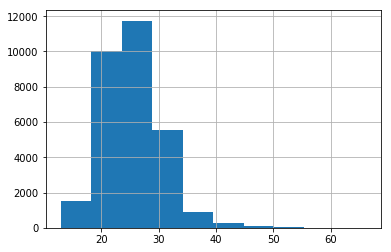

In [6]:
olympicEvents['Age'].hist()

*Looks relatively normal, move on*

## Run the Analysis

In [7]:
stats.ttest_1samp(olympicEvents['Age'], 22)

Ttest_1sampResult(statistic=117.96999514411488, pvalue=0.0)

*Yes, the average age is different than 22. But is it higher or lower?*

In [8]:
olympicEvents.Age.mean()

25.42901162983334

# Independent t-test

*Does the average age differ between men and women?*

## Test Assumptions - Normal Distribution

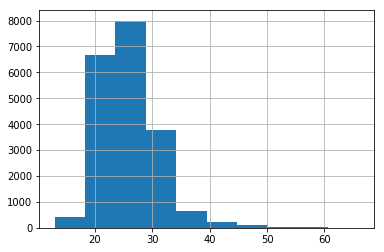

In [9]:
olympicEvents.Age[olympicEvents.Sex == 'M'].hist()

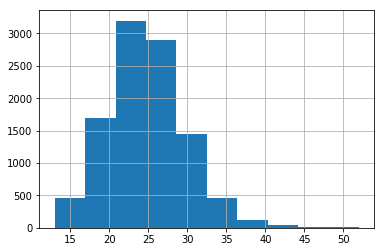

In [10]:
olympicEvents.Age[olympicEvents.Sex == 'F'].hist()

*Yes, both approximately normal*

## Run the Analysis

In [11]:
ttest_ind(olympicEvents.Age[olympicEvents.Sex == 'M'], olympicEvents.Age[olympicEvents.Sex == 'F'])

Ttest_indResult(statistic=20.811905071131516, pvalue=1.5853311644818236e-95)

*Yes, their average ages are different. How different?*

In [13]:
olympicEvents.groupby('Sex')['Age'].mean()

Sex
F    24.597585
M    25.862942
Name: Age, dtype: float64

# Dependent t-test

*Does age differ by year?*

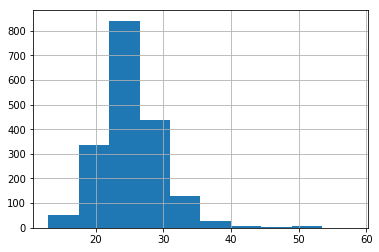

In [15]:
olympicEvents.Age[olympicEvents.Year == 1992].hist()

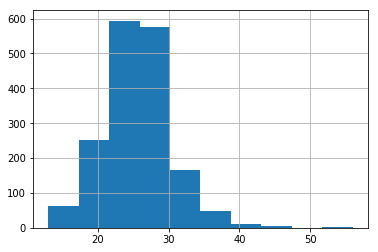

In [16]:
olympicEvents.Age[olympicEvents.Year == 1996].hist()

In [31]:
olympicEvents1 = pd.melt(olympicEvents, id_vars=['Sport', 'Year'], value_vars=['Age'])

In [32]:
olympicEvents1.head()

,Sport,Year,variable,value
0,Ice Hockey,2014,Age,28.0
1,Gymnastics,1948,Age,28.0
2,Gymnastics,1948,Age,28.0
3,Gymnastics,1948,Age,28.0
4,Gymnastics,1948,Age,28.0


In [40]:
years = [1992, 1996]
olympicEvents2 = olympicEvents1[olympicEvents1.Year.isin(years)]

In [41]:
olympicEvents2.head(20)

,Sport,Year,variable,value
6,Alpine Skiing,1992,Age,20.0
7,Alpine Skiing,1992,Age,20.0
14,Rowing,1996,Age,26.0
15,Football,1996,Age,23.0
25,Water Polo,1996,Age,22.0
31,Fencing,1992,Age,30.0
33,Rowing,1996,Age,29.0
37,Rowing,1992,Age,30.0
40,Rowing,1992,Age,33.0
51,Wrestling,1996,Age,25.0


In [47]:
olympicEvents3 = olympicEvents2.groupby(['Sport', 'Year'])['value'].mean()

In [60]:
olympicEvents4 = olympicEvents3.unstack()

In [61]:
olympicEvents4.head()

Year,1992,1996
Sport,,
Alpine Skiing,23.866667,NaN
Archery,24.210526,24.450000
Athletics,25.797753,26.566667
Badminton,25.117647,24.666667
Baseball,25.466667,24.200000


In [62]:
olympicEvents4.dropna(inplace=True)

## Run the Analysis

In [63]:
stats.ttest_rel(olympicEvents4[1992], olympicEvents4[1996])

Ttest_relResult(statistic=-2.2822883154932674, pvalue=0.030271538873384646)

# Independent Chi-Square

*Does the season influence the types of medals given out?*

In [19]:
crosstab = pd.crosstab(olympicEvents['Season'], olympicEvents['Medal'])

In [20]:
crosstab

Medal,Bronze,Gold,Silver
Season,,,
Summer,8566,8542,8233
Winter,1582,1625,1633


In [21]:
stats.chi2_contingency(crosstab)

(3.4745101681496746,
 0.17600285120006448,
 2,
 array([[8520.60793214, 8536.56098207, 8283.83108578],
        [1627.39206786, 1630.43901793, 1582.16891422]]))

*No, there is no influence on season in the distribution of medals given out*

*Does meet the assumption of 5 cases per cell*

# Correlation

In [22]:
olympicEvents['Height'].corr(olympicEvents['Weight'])

0.8018308248560182

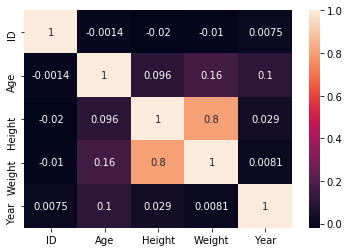

In [23]:
sns.heatmap(olympicEvents.corr(), annot=True)